In [1]:
import pandas as pd
from pymrmre import mrmr
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import math

In [2]:
data = pd.read_csv(r'application_train.csv')
df = pd.DataFrame(data)

In [3]:
#Looking to see which coolumn has most NaNs
nulls = df.isnull().sum().to_frame()
for index, row in nulls.iterrows():
    print(index, row[0])

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 202929
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 96391
CNT_FAM_MEMBERS 2
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_1 173378
EXT_SOURCE_2 660
EXT_SOURCE_3 60965
APARTMENTS_AVG 156061
BASEMENTAREA_AVG 179943
YEARS_BEGINEXPLUATATION_AVG 150007
YEARS_BUILD_AVG 204488
COMMONAREA_AVG 214865
ELE

In [26]:
# deleting colums with most NaNs. All these colums have more than 10K NaNs. Some have more than 20K.
NaNs = ['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG','FLOORSMAX_AVG','FLOORSMIN_AVG','LANDAREA_AVG',
'LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG','NONLIVINGAREA_AVG','APARTMENTS_MODE','BASEMENTAREA_MODE',
'YEARS_BEGINEXPLUATATION_MODE','YEARS_BUILD_MODE','COMMONAREA_MODE','ELEVATORS_MODE','ENTRANCES_MODE','FLOORSMAX_MODE',
'FLOORSMIN_MODE','LANDAREA_MODE','LIVINGAPARTMENTS_MODE','LIVINGAREA_MODE','NONLIVINGAPARTMENTS_MODE','NONLIVINGAREA_MODE',
'APARTMENTS_MEDI','BASEMENTAREA_MEDI','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BUILD_MEDI','COMMONAREA_MEDI','ELEVATORS_MEDI',
'ENTRANCES_MEDI','FLOORSMAX_MEDI','FLOORSMIN_MEDI','LANDAREA_MEDI','LIVINGAPARTMENTS_MEDI','LIVINGAREA_MEDI',
'NONLIVINGAPARTMENTS_MEDI','NONLIVINGAREA_MEDI','FONDKAPREMONT_MODE','HOUSETYPE_MODE','TOTALAREA_MODE','WALLSMATERIAL_MODE',
'EMERGENCYSTATE_MODE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']


X = df.drop(['TARGET','SK_ID_CURR'], axis=1)
X = X.drop(NaNs, axis = 1)
  
Y = df['TARGET']

le = preprocessing.LabelEncoder()
le.fit(X['NAME_CONTRACT_TYPE'])
X['NAME_CONTRACT_TYPE'] = le.transform(X['NAME_CONTRACT_TYPE'])

le.fit(X['CODE_GENDER'])
X['CODE_GENDER'] = le.transform(X['CODE_GENDER'])

le.fit(X['FLAG_OWN_CAR'])
X['FLAG_OWN_CAR'] = le.transform(X['FLAG_OWN_CAR'])

le.fit(X['FLAG_OWN_REALTY'])
X['FLAG_OWN_REALTY'] = le.transform(X['FLAG_OWN_REALTY'])

le.fit(X['NAME_TYPE_SUITE'].astype(str))
X['NAME_TYPE_SUITE'] = le.transform(X['NAME_TYPE_SUITE'].astype(str))

le.fit(X['NAME_INCOME_TYPE'])
X['NAME_INCOME_TYPE'] = le.transform(X['NAME_INCOME_TYPE'])

le.fit(X['NAME_EDUCATION_TYPE'])
X['NAME_EDUCATION_TYPE'] = le.transform(X['NAME_EDUCATION_TYPE'])

le.fit(X['NAME_FAMILY_STATUS'])
X['NAME_FAMILY_STATUS'] = le.transform(X['NAME_FAMILY_STATUS'])

le.fit(X['NAME_HOUSING_TYPE'].astype(str))
X['NAME_HOUSING_TYPE'] = le.transform(X['NAME_HOUSING_TYPE'].astype(str))

le.fit(X['OCCUPATION_TYPE'].astype(str))
X['OCCUPATION_TYPE'] = le.transform(X['OCCUPATION_TYPE'].astype(str))
                                      
le.fit(X['WEEKDAY_APPR_PROCESS_START'])
X['WEEKDAY_APPR_PROCESS_START'] = le.transform(X['WEEKDAY_APPR_PROCESS_START'])
                                                                           
le.fit(X['ORGANIZATION_TYPE'])
X['ORGANIZATION_TYPE'] = le.transform(X['ORGANIZATION_TYPE'])



#Any feature with NaNs, are features with less than 1K NaNs. Therefore, replacing NaNs with means of that column

X.fillna(X.mean(), inplace=True)
X = X.fillna(X.mean())

X


KeyError: 'FONDKAPREMONT_MODE'

In [5]:
# Logistic reggression importance

model = LogisticRegression(random_state=0, max_iter = 500).fit(X.values, Y.values)
score = model.score(X.values, Y.values)
print(score)


0.9192646767107518


In [6]:
w0 = model.intercept_[0]
w = model.coef_[0]
w

array([-1.19500213e-07,  1.42712298e-07, -1.42595074e-07, -7.98345472e-08,
       -1.51709475e-07, -8.62003322e-07,  3.17538005e-06,  2.95941879e-06,
       -3.98159067e-06, -6.51024657e-07, -8.91780426e-08,  2.75059755e-07,
       -1.92880267e-07, -2.15498079e-07, -5.59046645e-09,  1.01072529e-04,
        8.85503386e-07,  2.85751301e-05,  1.01125804e-04, -8.52231248e-07,
       -1.35950930e-07, -1.34157905e-07,  4.31531607e-08, -1.35099365e-07,
       -6.68997623e-08, -2.88742144e-08, -1.15396864e-06, -4.02953933e-07,
       -7.65950565e-08, -6.76333377e-08, -3.26054333e-07, -2.39913291e-06,
       -3.46106928e-09, -3.73584568e-09, -3.25727031e-09,  2.57328204e-08,
        4.34495628e-08,  3.10582100e-08, -3.80331630e-06, -3.42876456e-08,
        9.51960129e-08, -3.37996270e-08,  7.59198919e-08,  2.33584151e-04,
        3.74889866e-10,  4.09724226e-08, -1.68040817e-10, -1.55296250e-09,
        2.20565312e-09, -1.03713756e-10, -4.36202588e-08, -3.29612073e-09,
       -4.66413867e-11, -

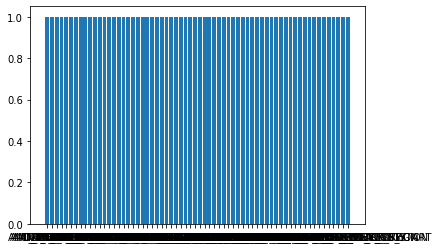

In [7]:
feature_importance = (X.columns).values
importance = pow(math.e, w)
feature_importance = np.append([feature_importance],[importance],axis = 0)
#feature_importance = pd.DataFrame(feature_importance)
feature_importance
feature_importance = np.sort(feature_importance)
#feature_importance = feature_importance.sort_values(by = [feature_importance.iloc[1]], ascending=False)
 
plt.bar(feature_importance[0],feature_importance[1])
plt.show()

In [8]:
feature_importance[0]

array(['AMT_ANNUITY', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_INCOME_TOTAL',
       'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'CODE_GENDER', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_REGISTRATION', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'FLAG_CONT_MOBILE', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
       'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_EMAIL', 'FLAG_EMP_PHONE', 'FLAG_MOBIL',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_PHONE', 'FLAG_WORK_PHONE',
       'HOUR_APPR_PROCESS_START', 'LIVE_CITY_NOT_WORK_CITY',
       'LIVE_REGION_NOT_WORK_REGION', 'NAME_CONTRAC

In [9]:
# Random Forest
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

In [11]:
rf = RandomForestRegressor(n_estimators=64)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=64, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [12]:
rf.feature_importances_

array([2.03214784e-03, 5.09338984e-03, 3.97111277e-03, 6.84721741e-03,
       8.59535992e-03, 5.14133153e-02, 4.94858222e-02, 6.63479351e-02,
       3.59263406e-02, 1.15387001e-02, 8.67467477e-03, 1.04093187e-02,
       1.66461723e-02, 1.10117205e-02, 4.96417031e-02, 8.13480982e-02,
       6.97479059e-02, 8.02191825e-02, 7.78046803e-02, 2.64728361e-02,
       0.00000000e+00, 6.85188186e-04, 6.71471859e-03, 6.62477380e-04,
       6.70997146e-03, 4.71483356e-03, 2.59315466e-02, 1.27558436e-02,
       5.17565278e-03, 5.96340289e-03, 2.62506344e-02, 4.36631462e-02,
       1.82770622e-03, 1.98506814e-03, 2.33755130e-03, 5.44864743e-03,
       5.04712152e-03, 4.96485399e-03, 3.48818346e-02, 1.60914018e-02,
       7.98811937e-03, 1.60066223e-02, 6.83787605e-03, 6.75514951e-02,
       1.51990700e-04, 4.21060363e-03, 0.00000000e+00, 2.28485307e-03,
       2.28326665e-03, 9.51989423e-05, 2.42748410e-03, 7.41938206e-04,
       0.00000000e+00, 5.05394211e-04, 0.00000000e+00, 2.00034757e-04,
      

Text(0.5, 0, 'Random Forest Feature Importance')

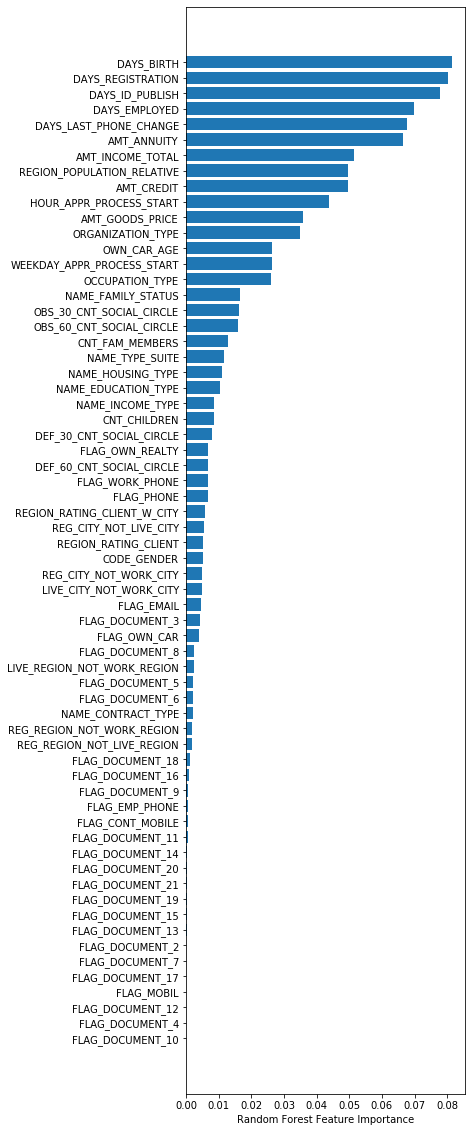

In [19]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize = (5,20))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [32]:
X.columns[sorted_idx]

Index(['FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12', 'FLAG_MOBIL',
       'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_20',
       ...
       'REGION_POPULATION_RELATIVE', 'EXT_SOURCE_1', 'DAYS_LAST_PHONE_CHANGE',
       'DAYS_EMPLOYED', 'AMT_ANNUITY', 'DAYS_REGISTRATION', 'DAYS_BIRTH',
       'DAYS_ID_PUBLISH', 'EXT_SOURCE_3', 'EXT_SOURCE_2'],
      dtype='object', length=120)

In [27]:
X = df.drop(['TARGET','SK_ID_CURR'], axis=1)
Y = df['TARGET']

le = preprocessing.LabelEncoder()
le.fit(X['NAME_CONTRACT_TYPE'])
X['NAME_CONTRACT_TYPE'] = le.transform(X['NAME_CONTRACT_TYPE'])

le.fit(X['CODE_GENDER'])
X['CODE_GENDER'] = le.transform(X['CODE_GENDER'])

le.fit(X['FLAG_OWN_CAR'])
X['FLAG_OWN_CAR'] = le.transform(X['FLAG_OWN_CAR'])

le.fit(X['FLAG_OWN_REALTY'])
X['FLAG_OWN_REALTY'] = le.transform(X['FLAG_OWN_REALTY'])

le.fit(X['NAME_TYPE_SUITE'].astype(str))
X['NAME_TYPE_SUITE'] = le.transform(X['NAME_TYPE_SUITE'].astype(str))

le.fit(X['NAME_INCOME_TYPE'])
X['NAME_INCOME_TYPE'] = le.transform(X['NAME_INCOME_TYPE'])

le.fit(X['NAME_EDUCATION_TYPE'])
X['NAME_EDUCATION_TYPE'] = le.transform(X['NAME_EDUCATION_TYPE'])

le.fit(X['NAME_FAMILY_STATUS'])
X['NAME_FAMILY_STATUS'] = le.transform(X['NAME_FAMILY_STATUS'])

le.fit(X['NAME_HOUSING_TYPE'].astype(str))
X['NAME_HOUSING_TYPE'] = le.transform(X['NAME_HOUSING_TYPE'].astype(str))

le.fit(X['OCCUPATION_TYPE'].astype(str))
X['OCCUPATION_TYPE'] = le.transform(X['OCCUPATION_TYPE'].astype(str))
                                      
le.fit(X['WEEKDAY_APPR_PROCESS_START'])
X['WEEKDAY_APPR_PROCESS_START'] = le.transform(X['WEEKDAY_APPR_PROCESS_START'])
                                                                         
le.fit(X['ORGANIZATION_TYPE'])
X['ORGANIZATION_TYPE'] = le.transform(X['ORGANIZATION_TYPE'])

le.fit(X['FONDKAPREMONT_MODE'].astype(str))
X['FONDKAPREMONT_MODE'] = le.transform(X['FONDKAPREMONT_MODE'].astype(str))

le.fit(X['HOUSETYPE_MODE'].astype(str))
X['HOUSETYPE_MODE'] = le.transform(X['HOUSETYPE_MODE'].astype(str))

le.fit(X['WALLSMATERIAL_MODE'].astype(str))
X['WALLSMATERIAL_MODE'] = le.transform(X['WALLSMATERIAL_MODE'].astype(str))

le.fit(X['EMERGENCYSTATE_MODE'].astype(str))
X['EMERGENCYSTATE_MODE'] = le.transform(X['EMERGENCYSTATE_MODE'].astype(str))



#Any feature with NaNs, are features with less than 1K NaNs. Therefore, replacing NaNs with means of that column

X.fillna(X.mean(), inplace=True)
X = X.fillna(X.mean())
X.shape

(307511, 120)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

In [29]:
rf = RandomForestRegressor(n_estimators=120)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=120, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [30]:
rf.feature_importances_

array([1.55793625e-03, 4.77958045e-03, 2.90189217e-03, 3.89236013e-03,
       5.62178100e-03, 3.20953116e-02, 2.88682782e-02, 3.88479534e-02,
       2.16423387e-02, 7.42700032e-03, 5.44778522e-03, 5.45499199e-03,
       9.74440613e-03, 6.82762637e-03, 3.23722393e-02, 4.78068241e-02,
       3.86823738e-02, 4.73227170e-02, 4.81658536e-02, 1.84748308e-02,
       0.00000000e+00, 6.48960637e-04, 4.09292334e-03, 5.33803782e-04,
       3.55990773e-03, 2.39218395e-03, 1.60823593e-02, 8.25152297e-03,
       3.40269567e-03, 3.71150106e-03, 1.51516385e-02, 2.71755907e-02,
       1.40639262e-03, 1.44913067e-03, 1.70415426e-03, 4.18069677e-03,
       3.15164797e-03, 3.36084833e-03, 2.10687982e-02, 3.44584790e-02,
       7.62081959e-02, 6.09317131e-02, 4.25519876e-03, 4.43690815e-03,
       5.59424361e-03, 3.91295451e-03, 4.02743215e-03, 1.71346984e-03,
       3.91514961e-03, 2.68105674e-03, 2.60396230e-03, 5.19092137e-03,
       3.73927854e-03, 5.29463719e-03, 2.15593430e-03, 4.16464610e-03,
      

Text(0.5, 0, 'Random Forest Feature Importance')

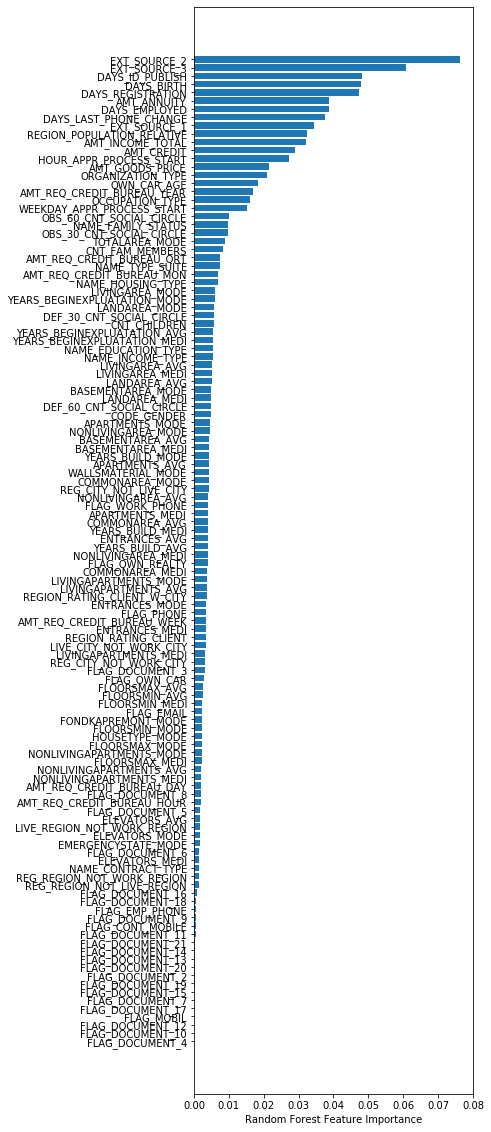

In [31]:
sorted_idx = rf.feature_importances_.argsort()
plt.figure(figsize = (5,20))
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")